In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('../data_final/european_co2_last5years.csv')

# Rename columns
filtered_df = df.rename(columns={'country': 'Country', 'year': 'Year', 'population': 'Population',
                                'co2': 'CO2 (Mt)', 'co2_per_capita': 'CO2 (per capita)'})

# Filter for only needed columns
relevant_columns = ['Country', 'Year', 'Population', 'CO2 (Mt)', 'CO2 (per capita)']
filtered_df = filtered_df[relevant_columns]

# Sort
filtered_df = filtered_df.sort_values(by='Country')
filtered_df.head()

,Country,Year,Population,CO2 (Mt),CO2 (per capita)
0,Albania,2019,2885012.0,4.827,1.673
1,Albania,2020,2871951.0,4.711,1.640
2,Albania,2021,2849643.0,5.134,1.802
3,Albania,2022,2827615.0,5.173,1.830
4,Albania,2023,2811660.0,5.144,1.830


In [65]:
print(f'Data shape: {filtered_df.shape[0]} rows, {filtered_df.shape[1]} columns')

Data shape: 250 rows, 5 columns


In [4]:
# Get the distinct countries
distinct_countries_count = filtered_df['Country'].nunique()
distinct_countries = filtered_df['Country'].unique()

# Display the result
print(f'There are {distinct_countries_count} countries in the dataset')
print(f'Countries: {distinct_countries}')

There are 50 countries in the dataset
Countries: ['Albania' 'Andorra' 'Armenia' 'Austria' 'Azerbaijan' 'Belarus' 'Belgium'
 'Bosnia and Herzegovina' 'Bulgaria' 'Croatia' 'Cyprus' 'Czechia'
 'Denmark' 'Estonia' 'Finland' 'France' 'Georgia' 'Germany' 'Greece'
 'Hungary' 'Iceland' 'Ireland' 'Italy' 'Kosovo' 'Latvia' 'Liechtenstein'
 'Lithuania' 'Luxembourg' 'Malta' 'Moldova' 'Monaco' 'Montenegro'
 'Netherlands' 'North Macedonia' 'Norway' 'Poland' 'Portugal' 'Romania'
 'Russia' 'San Marino' 'Serbia' 'Slovakia' 'Slovenia' 'Spain' 'Sweden'
 'Switzerland' 'Turkey' 'Ukraine' 'United Kingdom' 'Vatican']


In [5]:
# Rename countries to match the names from other datasets
country_mapping = {'Czechia': 'Czech Republic', 'Russia': 'Russian Federation'}

filtered_df['Country'] = filtered_df['Country'].replace(country_mapping)

In [6]:
# Get the distinct countries
distinct_countries = filtered_df['Country'].unique()

# Display the result
print(f'Countries: {distinct_countries}')

Countries: ['Albania' 'Andorra' 'Armenia' 'Austria' 'Azerbaijan' 'Belarus' 'Belgium'
 'Bosnia and Herzegovina' 'Bulgaria' 'Croatia' 'Cyprus' 'Czech Republic'
 'Denmark' 'Estonia' 'Finland' 'France' 'Georgia' 'Germany' 'Greece'
 'Hungary' 'Iceland' 'Ireland' 'Italy' 'Kosovo' 'Latvia' 'Liechtenstein'
 'Lithuania' 'Luxembourg' 'Malta' 'Moldova' 'Monaco' 'Montenegro'
 'Netherlands' 'North Macedonia' 'Norway' 'Poland' 'Portugal' 'Romania'
 'Russian Federation' 'San Marino' 'Serbia' 'Slovakia' 'Slovenia' 'Spain'
 'Sweden' 'Switzerland' 'Turkey' 'Ukraine' 'United Kingdom' 'Vatican']


In [70]:
filtered_df.describe()

,Year,Population,CO2 (Mt),CO2 (per capita)
count,250.000000,2.500000e+02,235.000000,235.000000
mean,2021.000000,1.704866e+07,120.897468,5.613119
std,1.417051,2.884474e+07,273.628657,2.317087
min,2019.000000,5.010000e+02,0.142000,1.640000
25%,2020.000000,1.856337e+06,8.383500,3.965000
50%,2021.000000,5.520460e+06,36.703000,5.091000
75%,2022.000000,1.069283e+07,84.496000,6.819500
max,2023.000000,1.465331e+08,1815.925000,15.741000


Country              0
Year                 0
Population           0
CO2 (Mt)            15
CO2 (per capita)    15
dtype: int64

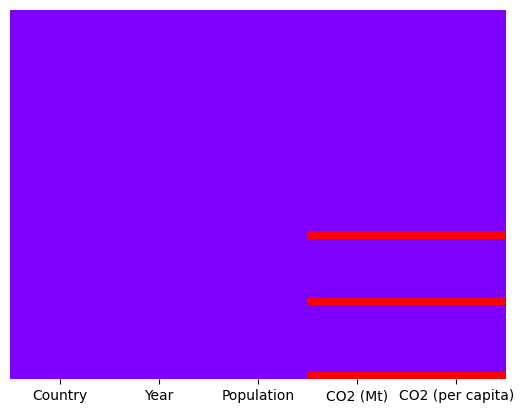

In [71]:
# Display null values
sns.heatmap(filtered_df.isnull(), yticklabels = False, cbar = False, cmap = 'rainbow')

# Count null values
filtered_df.isnull().sum()

In [23]:
# Find rows with  null values
null_co2_rows = filtered_df[filtered_df['CO2 (Mt)'].isnull()]

# Display rows with null values
print("Rows with null 'CO2 (Mt)':")
print(null_co2_rows)

# Drop rows for Monaco, San Marino, Vatican
countries_to_drop = ['Monaco', 'San Marino', 'Vatican']
filtered_df_w_dropped_countries = filtered_df[~filtered_df['Country'].isin(countries_to_drop)]



Rows with null 'CO2 (Mt)':
        Country  Year  Population  CO2 (Mt)  CO2 (per capita)
153      Monaco  2022     38949.0       NaN               NaN
152      Monaco  2021     38548.0       NaN               NaN
154      Monaco  2023     38978.0       NaN               NaN
150      Monaco  2019     38131.0       NaN               NaN
151      Monaco  2020     38074.0       NaN               NaN
195  San Marino  2019     34674.0       NaN               NaN
196  San Marino  2020     34796.0       NaN               NaN
197  San Marino  2021     34599.0       NaN               NaN
198  San Marino  2022     34113.0       NaN               NaN
199  San Marino  2023     33761.0       NaN               NaN
248     Vatican  2022       513.0       NaN               NaN
245     Vatican  2019       543.0       NaN               NaN
246     Vatican  2020       536.0       NaN               NaN
247     Vatican  2021       527.0       NaN               NaN
249     Vatican  2023       501.0       NaN

,Country,Year,Population,CO2 (Mt),CO2 (per capita)
244,United Kingdom,2023,68682965.0,305.146,4.443
243,United Kingdom,2022,68179315.0,313.835,4.603
241,United Kingdom,2020,67351860.0,326.263,4.844
240,United Kingdom,2019,67110958.0,364.753,5.435
242,United Kingdom,2021,67668789.0,344.510,5.091


In [8]:
# Drop rows for Monaco, San Marino, Vatican
countries_to_drop = ['Monaco', 'San Marino', 'Vatican']

filtered_df_w_dropped_countries = filtered_df[~filtered_df['Country'].isin(countries_to_drop)]
filtered_df_w_dropped_countries.tail()


,Country,Year,Population,CO2 (Mt),CO2 (per capita)
244,United Kingdom,2023,68682965.0,305.146,4.443
243,United Kingdom,2022,68179315.0,313.835,4.603
241,United Kingdom,2020,67351860.0,326.263,4.844
240,United Kingdom,2019,67110958.0,364.753,5.435
242,United Kingdom,2021,67668789.0,344.510,5.091


In [9]:
print(f'Data shape after dropping 4 countries (rows, columns): {filtered_df_w_dropped_countries.shape}')

Data shape after dropping 4 countries (rows, columns): (235, 5)


In [10]:
unique_values_count = filtered_df_w_dropped_countries['Country'].nunique()
print(f'{unique_values_count}')

47


In [91]:
# Prepare file for using for forecast
forecast_df = filtered_df_w_dropped_countries[['Country', 'Year', 'CO2 (per capita)']]
forecast_df = forecast_df.pivot(index='Country', columns='Year', values='CO2 (per capita)')
forecast_df = forecast_df.reset_index()

# Save file
forecast_df.to_csv('../data_for_forecast/co2_per_capita-clean.csv', index=False)
forecast_df.head()

Year,Country,2019,2020,2021,2022,2023
0,Albania,1.673,1.640,1.802,1.830,1.830
1,Andorra,6.419,4.923,5.236,5.263,5.242
2,Armenia,2.164,2.351,2.584,2.487,2.585
3,Austria,7.651,6.969,7.333,6.783,6.416
4,Azerbaijan,3.733,3.559,3.742,3.923,4.258


In [107]:
# Prepare file for using for visualisation
vis_df = filtered_df_w_dropped_countries[['Country', 'Year', 'Population', 'CO2 (Mt)', 'CO2 (per capita)']]
vis_df = vis_df.pivot(index='Country', columns='Year', values=['Population', 'CO2 (Mt)', 'CO2 (per capita)'])
vis_df = vis_df.reset_index()


# Save file
vis_df.to_excel('../data_subindex/co2_full.xlsx')
vis_df.head()


Country  Population                                                  \
Year                    2019        2020        2021        2022        2023   
0        Albania   2885012.0   2871951.0   2849643.0   2827615.0   2811660.0   
1        Andorra     76491.0     77398.0     78375.0     79722.0     80868.0   
2        Armenia   2903975.0   2890894.0   2870339.0   2880883.0   2943395.0   
3        Austria   8880875.0   8921402.0   8967053.0   9064679.0   9130434.0   
4     Azerbaijan  10110486.0  10181736.0  10234373.0  10295307.0  10318210.0   

     CO2 (Mt)                                 CO2 (per capita)                \
Year     2019    2020    2021    2022    2023             2019   2020   2021   
0       4.827   4.711   5.134   5.173   5.144            1.673  1.640  1.802   
1       0.491   0.381   0.410   0.420   0.424            6.419  4.923  5.236   
2       6.284   6.795   7.417   7.165   7.608            2.164  2.351  2.584   
3      67.946  62.176  65.757  61.489  58.578            7.651  6.969  7.333   
4      37.746  36.233  38.293  40.391  43.937            3.733  3.559  3.742   

                    
Year   2022   2023  
0     1.830  1.830  
1     5.263  5.242  
2     2.487  2.585  
3     6.783  6.416  
4     3.923  4.258

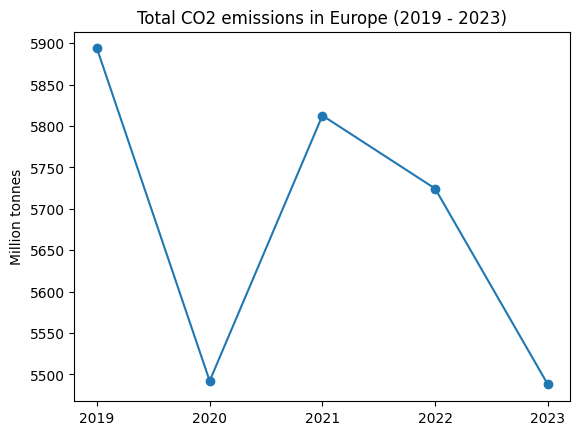

In [11]:
# TREND ANALYSIS OVER TIME - TOTAL CO2 EMISSIONS OVER THE YEARS

yearly_co2 = filtered_df_w_dropped_countries.groupby('Year')['CO2 (Mt)'].sum()
plt.plot(yearly_co2.index, yearly_co2.values, marker='o')
plt.xticks([2019,2020,2021,2022,2023])
plt.title('Total CO2 emissions in Europe (2019 - 2023)')
plt.ylabel('Million tonnes')
plt.show()


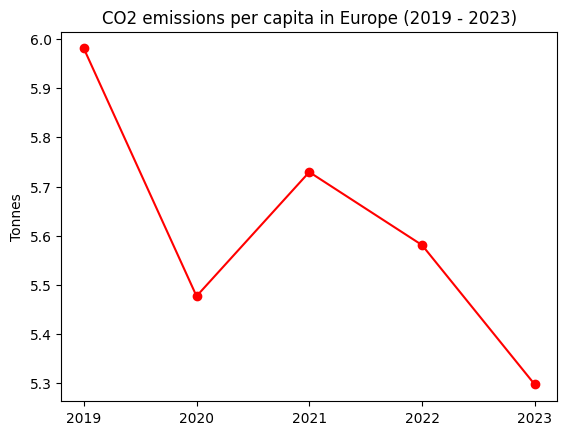

In [12]:
# TREND ANALYSIS OVER TIME - CO2 EMISSIONS PER CAPITA THE YEARS
yearly_co2_per_capita = filtered_df_w_dropped_countries.groupby('Year')['CO2 (per capita)'].mean()
plt.plot(yearly_co2_per_capita.index, yearly_co2_per_capita.values, marker='o', color='red')
plt.xticks([2019,2020,2021,2022,2023])
plt.title('CO2 emissions per capita in Europe (2019 - 2023)')
plt.ylabel('Tonnes')
plt.show()

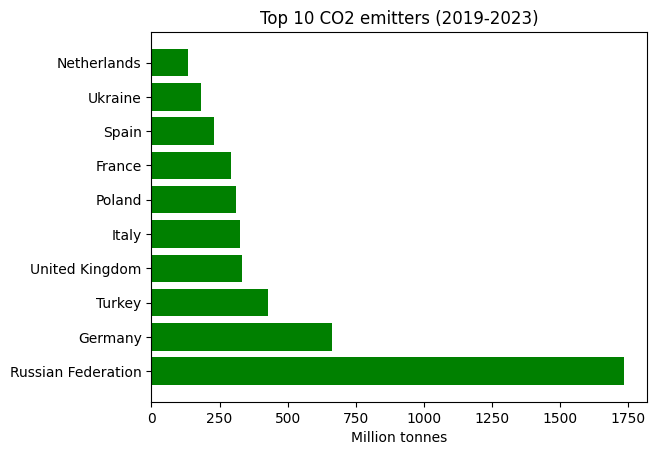

In [ ]:
# TOP CO2 EMITTERS (2019-2023)
avg_co2 = filtered_df_w_dropped_countries.groupby('Country')['CO2 (Mt)'].mean().reset_index()

top_countries = avg_co2[['Country', 'CO2 (Mt)']].sort_values(by='CO2 (Mt)', ascending=False)
print(top_countries.head(10))

# Plot the top 10 countries
plt.barh(top_countries['Country'][:10], top_countries['CO2 (Mt)'][:10], color='green')
plt.title('Top 10 CO2 emitters (2019-2023)')
plt.xlabel('Million tonnes')
plt.show()



               Country  CO2 (per capita)
27          Luxembourg           12.6698
37  Russian Federation           11.8792
20             Iceland            9.5186
11      Czech Republic            8.8536
34              Poland            8.1212
13             Estonia            8.0034
6              Belgium            7.9086
17             Germany            7.8790
31         Netherlands            7.5968
33              Norway            7.5558


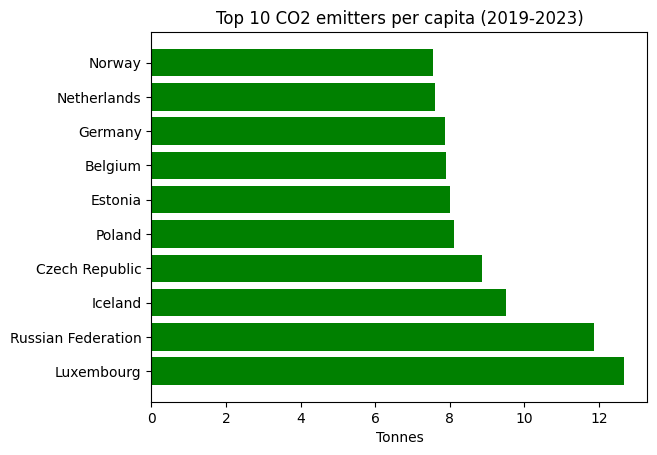

In [96]:
# TOP CO2 EMITTERS PER CAPITA (2019-2023)

avg_co2 = filtered_df_w_dropped_countries.groupby('Country')['CO2 (per capita)'].mean().reset_index()

top_countries = avg_co2[['Country', 'CO2 (per capita)']].sort_values(by='CO2 (per capita)', ascending=False)
print(top_countries.head(10))

# Plot the top 10 countries
plt.barh(top_countries['Country'][:10], top_countries['CO2 (per capita)'][:10], color='green')
plt.title('Top 10 CO2 emitters per capita (2019-2023)')
plt.xlabel('Tonnes')
plt.show()



In [18]:
# CO2 sustainability score - lower CO2 emissions per capita -> better sustainability

# Group by country and calculate the average CO2 per capita over all years
avg_co2 = filtered_df_w_dropped_countries.groupby('Country')['CO2 (per capita)'].mean().reset_index()

#  Normalize the average values (0 = worst, 1 = best)
max_val = avg_co2['CO2 (per capita)'].max()
min_val = avg_co2['CO2 (per capita)'].min()

avg_co2['co2_subindex'] = round((max_val - avg_co2['CO2 (per capita)']) / (max_val - min_val),5)

# Sort
avg_co2.sort_values(by='co2_subindex', ascending=False)

,Country,CO2 (per capita),co2_subindex
0,Albania,1.7550,1.00000
29,Moldova,1.8512,0.99119
2,Armenia,2.4342,0.93777
16,Georgia,2.9422,0.89123
28,Malta,3.2416,0.86380
42,Sweden,3.6528,0.82613
24,Latvia,3.6990,0.82189
36,Romania,3.8226,0.81057
25,Liechtenstein,3.8272,0.81015
32,North Macedonia,3.8386,0.80910


In [98]:
# Save the filtered data
avg_co2.to_csv('../data_subindex/subindex_european_co2_2019-2023.csv', index=False)

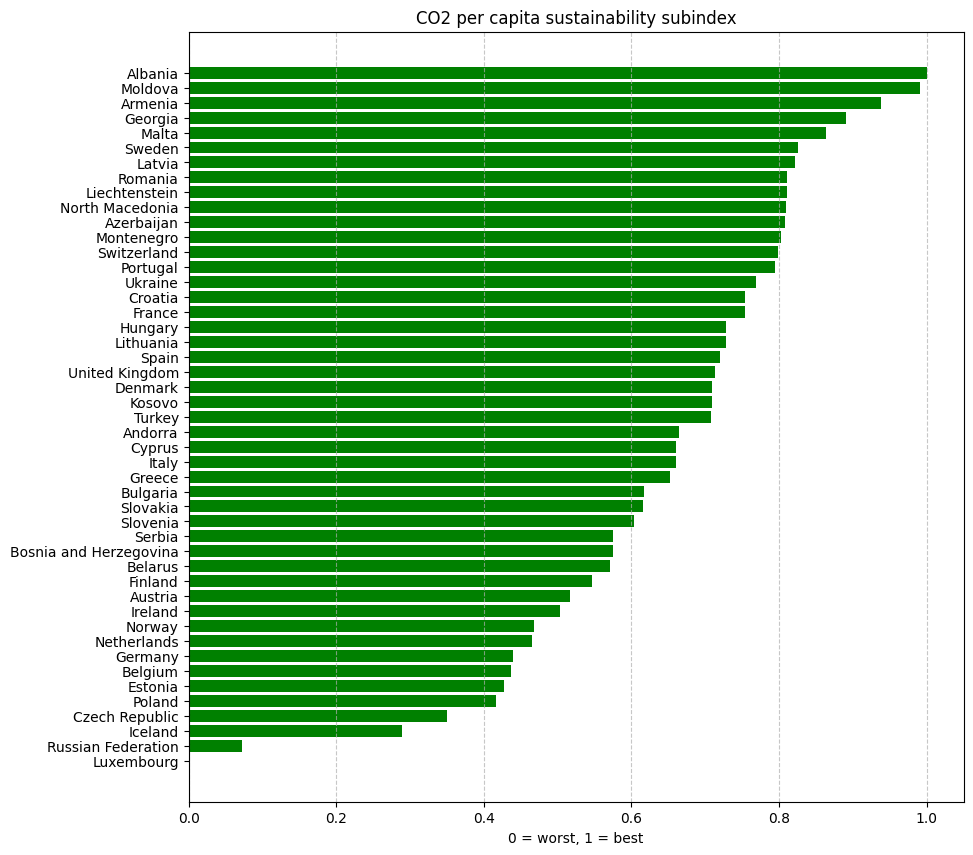

In [22]:
# Save the filtered data
avg_co2.to_csv('../data_subindex/subindex_european_co2_2019-2023.csv', index=False)

# Plot
avg_co2 = avg_co2.sort_values(by='co2_subindex')

plt.figure(figsize=(10, 10))
plt.barh(avg_co2['Country'], avg_co2['co2_subindex'], color='green')
plt.xlabel('0 = worst, 1 = best')
plt.title('CO2 per capita sustainability subindex')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()